## Pick government securities from a country. The country selected should be one of the countries from your group so that you can fit a Nelson-Siegel model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline

## Be sure to pick maturities ranging from short-term to long-term (e.g. 6 month maturity to 20 or 30 year maturities).

In [2]:
# 2. Simulate (or insert real) Nigerian bond yields data
# (In practice, use actual data, here we simulate for illustration)
maturities = np.array([0.5, 1, 2, 3, 5, 10, 20])  # in years
yields = np.array([11.2, 11.8, 12.4, 12.8, 13.3, 14.1, 14.8])  # hypothetical, in %

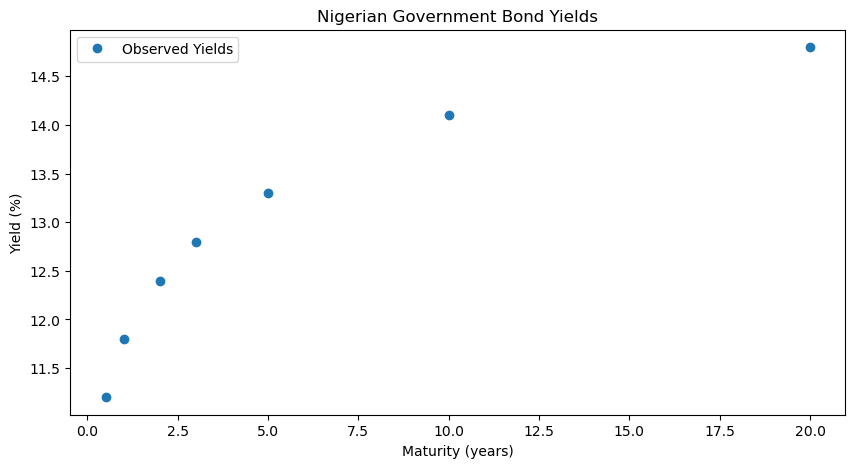

In [3]:
plt.figure(figsize=(10,5))
plt.plot(maturities, yields, 'o', label='Observed Yields')
plt.xlabel('Maturity (years)')
plt.ylabel('Yield (%)')
plt.title('Nigerian Government Bond Yields')
plt.legend()
plt.show()

## Fit a Nelson-Siegel model.

In [4]:
# 3. Nelson-Siegel Model Fitting
def nelson_siegel(t, beta0, beta1, beta2, tau):
    """Nelson-Siegel yield curve function"""
    return (beta0 + 
            beta1 * ((1 - np.exp(-t / tau)) / (t / tau)) + 
            beta2 * (((1 - np.exp(-t / tau)) / (t / tau)) - np.exp(-t / tau)))

# Initial guesses for parameters
initial_guess = [12, -1, 1, 2]

params, cov = curve_fit(nelson_siegel, maturities, yields, p0=initial_guess, maxfev=10000)
beta0, beta1, beta2, tau = params
print(f"Nelson-Siegel Parameters:\nBeta0: {beta0:.4f}\nBeta1: {beta1:.4f}\nBeta2: {beta2:.4f}\nTau: {tau:.4f}")

# Fitted Nelson-Siegel curve
fitted_ns = nelson_siegel(maturities, *params)
x_fit = np.linspace(0.5, 20, 100)
y_fit_ns = nelson_siegel(x_fit, *params)

Nelson-Siegel Parameters:
Beta0: 15.2386
Beta1: -4.3124
Beta2: -0.0013
Tau: 2.4448


## Fit a Cubic-Spline model.

In [5]:
# 4. Cubic Spline Fit
cs = CubicSpline(maturities, yields)
y_fit_spline = cs(x_fit)

## Compare the models in terms of 1) fit and 2) interpretation.

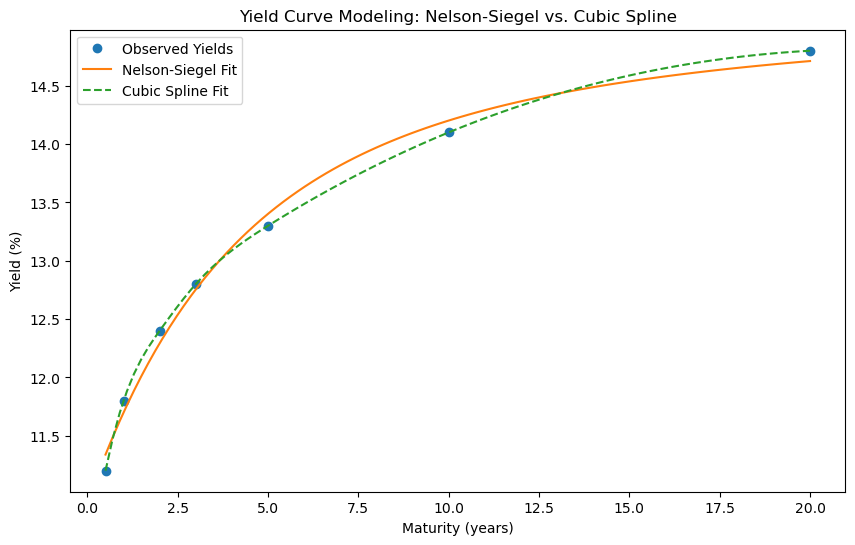

In [6]:
# 5. Plot Comparison
plt.figure(figsize=(10,6))
plt.plot(maturities, yields, 'o', label='Observed Yields')
plt.plot(x_fit, y_fit_ns, '-', label='Nelson-Siegel Fit')
plt.plot(x_fit, y_fit_spline, '--', label='Cubic Spline Fit')
plt.xlabel('Maturity (years)')
plt.ylabel('Yield (%)')
plt.title('Yield Curve Modeling: Nelson-Siegel vs. Cubic Spline')
plt.legend()
plt.show()

## Model Fit comparison

In [7]:
# 6. Model Fit Comparison
from sklearn.metrics import mean_squared_error

mse_ns = mean_squared_error(yields, fitted_ns)
mse_spline = mean_squared_error(yields, cs(maturities))

print(f"Mean Squared Error (Nelson-Siegel): {mse_ns:.4f}")
print(f"Mean Squared Error (Cubic Spline): {mse_spline:.4f}")

Mean Squared Error (Nelson-Siegel): 0.0102
Mean Squared Error (Cubic Spline): 0.0000


In [8]:
# 7. Model Interpretation
print("Model Interpretation:")
print(f"""
Nelson-Siegel Parameters:
- Beta0 (Level): {beta0:.2f} (long-term yield)
- Beta1 (Slope): {beta1:.2f} (short-term vs. long-term)
- Beta2 (Curvature): {beta2:.2f} (medium-term 'hump')
- Tau: {tau:.2f} (decay factor)
Cubic Spline:
- Spline interpolates the yields exactly at the observed maturities, but lacks interpretability.
""")

Model Interpretation:

Nelson-Siegel Parameters:
- Beta0 (Level): 15.24 (long-term yield)
- Beta1 (Slope): -4.31 (short-term vs. long-term)
- Beta2 (Curvature): -0.00 (medium-term 'hump')
- Tau: 2.44 (decay factor)
Cubic Spline:
- Spline interpolates the yields exactly at the observed maturities, but lacks interpretability.



## END